In [ ]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

Text(0, 0.5, 'weight')

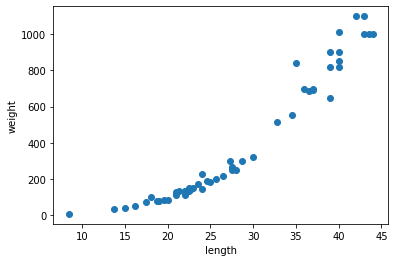

In [7]:
# 산점도

import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')

In [40]:
# 농어 데이터를 훈련, 테스트 데이터셋으로 구분

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [44]:
# sikit-learn에서 사용하기 위해서는 2차원 배열이여야 함. -> reshape 사용
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [45]:
train_input.shape

(42, 1)

In [48]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

# K-최근접 이웃 회귀 모델 훈련

knr.fit(train_input, train_target)
knr.score(test_input, test_target)


0.9928094061010639

In [53]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [55]:
knr.score(train_input, train_target)

0.9698823289099255

In [57]:
knr.n_neighbors = 3

knr.fit(train_input, train_target)
knr.score(train_input, train_target)

0.9804899950518966

In [59]:
knr.predict([[50]])

array([1033.33333333])

Text(0, 0.5, 'weight')

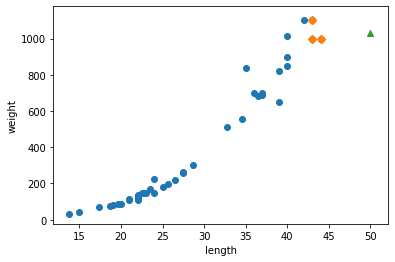

In [62]:
distance, indexs = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexs], train_target[indexs], marker='D' ) # 이웃샘플
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')

Text(0, 0.5, 'weight')

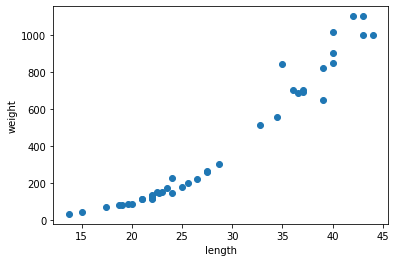

In [64]:
plt.scatter(train_input, train_target)
plt.xlabel('length')
plt.ylabel('weight')